<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris   #sklearn: 파이썬으로 통계분석할 때 쓰는 패키지.
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [ ]:
print('Data:', iris.data.shape)   #4개씩(컬럼) 묶어서  150개의 자료(row)
print('Label:', iris.target.shape)
print('feature name:', iris.feature_names)
print('target name', iris.target_names)
print('iris dataset keys \n ', iris.keys())   #iris는 딕셔너리와 유사한 타입. 정확히는 bunch이긴한데, 딕셔너리와 유사함.

Data: (150, 4)
Label: (150,)
feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name ['setosa' 'versicolor' 'virginica']
iris dataset keys 
  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
x= iris.data
y= iris.target

In [ ]:
# 세가지로 분류할때는 이진분류기 3개를 쓴다.   각각, a번인지 아닌지/ b번인지 아닌지 / c번인지 아닌지.

#생물학적 남잔지 여잔지는 이진분류기.  개냐 고양이냐는? 개랑고양이가 이미지 안에 다 있을수도있고, 개랑고양이 둘다 아닐수도 있어. 이러면 다중 분류기인데 두가지로 나오는 거지.
# 클래스 자체가 애초에 2개뿐이어야 이진분류기다.


#y를 원핫인코더로 만들자.

# encoder=OneHotEncoder()
encoder= OneHotEncoder(sparse=False)
y= y.reshape(-1,1)   #하나씩 묶을수있는만큼 묶어라
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y)
print(y)

#앞에 50개가 셀토사, 그다음 50개가 버진어쩌고, 그다음50개가 베로어쩌고..인 거임





(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(120, 4) (120, 3)
(30, 4) (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))   #feature name 4개였지 data shape도 그렇고
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))   #3개의 값을 확률값으로 바꿔줌. 즉 출력의 3가지 경우의 확률 합하면 1이됨.


In [ ]:
opt= Adam(lr= 0.001)  #경사하강알고리즘에서 러닝레이트. 아담은 러닝레이트 안 줘도 지가 알아서 잡음. 지역최저점에 안 빠지게 모멘텀값도 잡음.
#근데 그래도 정밀하게 가고 싶으면 아담에도 러닝레이트를 지정해주는 거임. 여기서도 아담이 조절해가면서 학습함.

#암튼 지금 아담 객체 따로 만들어준거.

model.compile(opt, loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#학습 시키자

fit_hist= model.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 4ms/step - loss: 0.7555 - accuracy: 0.6750
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8667
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.8833
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2225 - accuracy: 0.9083
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1852 - accuracy: 0.9333
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1892 - accuracy: 0.9250
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1448 - accuracy: 0.9417
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9583
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9417
Epoch 10/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1237 - accuracy: 0.9500
Epoch 11/50
24/24 [

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.9333333373069763


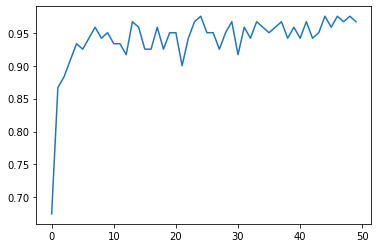

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [ ]:
my_sample= np.random.randint(30)
sample = X_test[my_sample]  #랜덤값으로 인덱싱해서 뽑아낸 샘플
print(sample)   #한 row의 네개의 컬럼값이 나온 거지.

[5.  2.3 3.3 1. ]


In [ ]:
sample= sample.reshape(-1,4)   #모델은 리스트안에 있는걸 하나씩 뽑아가는데, 4개르 한번에 뽑아가도록 해야하니까 다시 안쪽에서 리스트로 묶는 것.
print(sample)   

[[5.  2.3 3.3 1. ]]


In [ ]:
pred = model.predict(sample)  #모델한테 예측시켜봄
print('pred is :', pred )
print('actual is : ', Y_test[my_sample])
print('Target:', iris.target_names[np.argmax(Y_test[my_sample])])
print('Prediction after learning is:', iris.target_names[np.argmax(pred)])   

pred is : [[2.123134e-04 9.997540e-01 3.370945e-05]]
actual is :  [0. 1. 0.]
Target: versicolor
Prediction after learning is: versicolor
